<a href="https://colab.research.google.com/github/PabloLarreta17/Probabilidad/blob/main/Unidad1/Practica5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

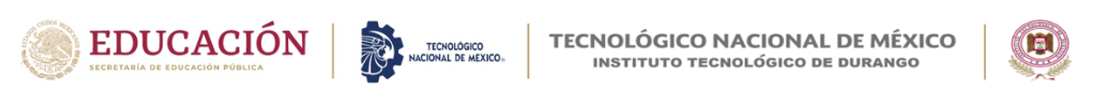
#**Probabilidad y estadistica**

##**Unidad 1**

### **Practica 5. Estadística descriptiva Dataset Autos

##Docente: *Dr. Jose Gabriel Rodriguez Rivas*

### Alumno: Pablo Larreta Mijares

In [1]:
## Cargar import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
#Cargar el Dataset de Autos y realizar las Estadísticas descriptivas básicas y medidas de tendencia central
from google.colab import files
uploaded = files.upload()

# Cambiar nombre del archivo seleccionado
autos_df = pd.read_csv("autos2.csv")
autos_df.head()


Saving autos2.csv to autos2 (2).csv


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [7]:
#Datos de la tabla
autos_df["price"] = pd.to_numeric(autos_df["price"], errors="coerce")

autos_df = autos_df.dropna(subset=["price"])
autos_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    float64
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       199 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non-null

In [8]:
##Estadisticas descriptivas de Dataset
min_price = autos_df["price"].min()
max_price = autos_df["price"].max()
mode_price = autos_df["price"].mode()[0]
mean_price = autos_df["price"].mean()
median_price = autos_df["price"].median()
std_price = autos_df["price"].std()
describe_price = autos_df["price"].describe()

print("📌 Estadísticas de precios")
print(f"Precio mínimo: {min_price}")
print(f"Precio máximo: {max_price}")
print(f"Moda: {mode_price}")
print(f"Media: {mean_price:.2f}")
print(f"Mediana: {median_price}")
print(f"Desviación estándar: {std_price:.2f}")
print("\nCon describe():\n", describe_price)


📌 Estadísticas de precios
Precio mínimo: 5118.0
Precio máximo: 45400.0
Moda: 5572.0
Media: 13207.13
Mediana: 10295.0
Desviación estándar: 7947.07

Con describe():
 count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64


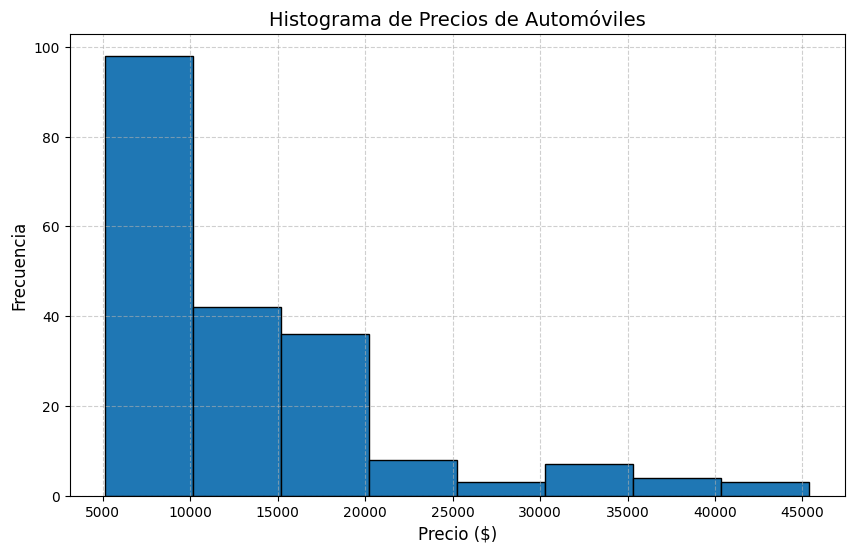

📌 Número óptimo de bins según Sturges: 8


In [9]:
#Realizar un Histograma de precios de los automóviles
n = autos_df["price"].shape[0]
sturges_bins = int(1 + 3.322 * np.log10(n))

plt.figure(figsize=(10,6))
plt.hist(autos_df["price"], bins=sturges_bins, edgecolor="black")
plt.title("Histograma de Precios de Automóviles", fontsize=14)
plt.xlabel("Precio ($)", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

print(f"📌 Número óptimo de bins según Sturges: {sturges_bins}")


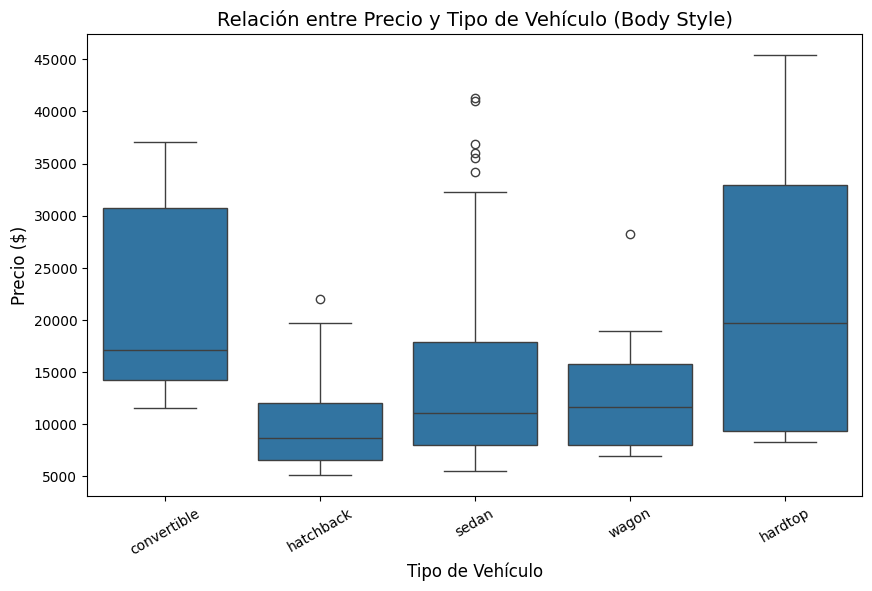

In [10]:
#Diagrama de caja y bigotes que muestre la relación estadística entre la columna del
#precio del automóvil (price) y tipo de vehículo (body style)

plt.figure(figsize=(10,6))
sns.boxplot(data=autos_df, x="body-style", y="price")
plt.title("Relación entre Precio y Tipo de Vehículo (Body Style)", fontsize=14)
plt.xlabel("Tipo de Vehículo", fontsize=12)
plt.ylabel("Precio ($)", fontsize=12)
plt.xticks(rotation=30)
plt.show()


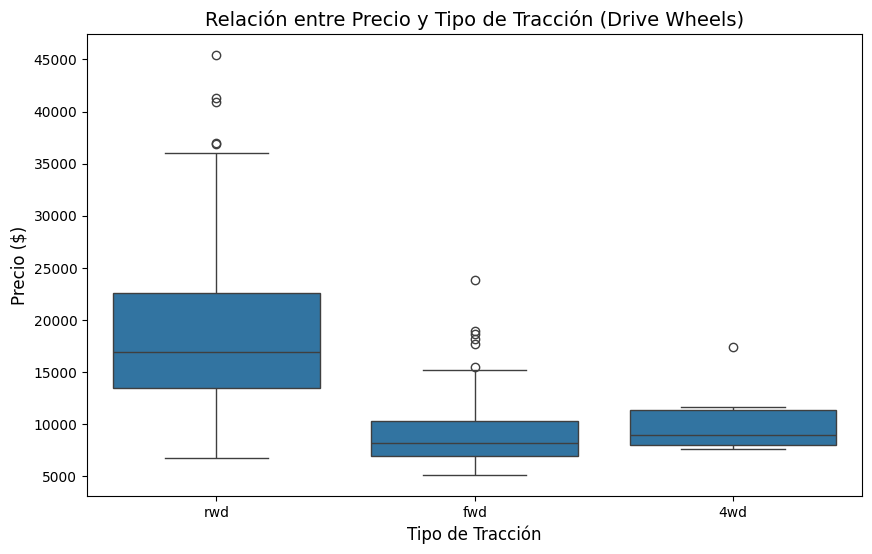

In [11]:
#Diagrama de caja y bigotes que muestre la relación estadística entre la columna
#del precio del automóvil (price) y tipo tracción ruedas (drive wheels)
plt.figure(figsize=(10,6))
sns.boxplot(data=autos_df, x="drive-wheels", y="price")
plt.title("Relación entre Precio y Tipo de Tracción (Drive Wheels)", fontsize=14)
plt.xlabel("Tipo de Tracción", fontsize=12)
plt.ylabel("Precio ($)", fontsize=12)
plt.show()


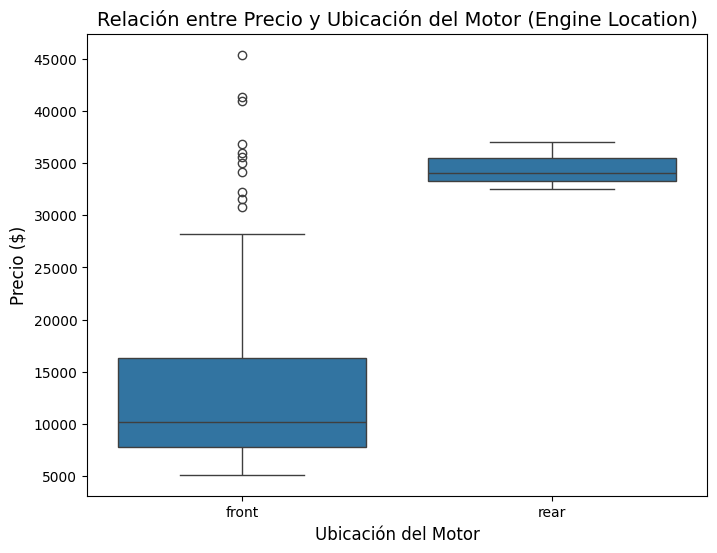

In [12]:
#Diagrama de caja y bigotes que muestre la relación estadística entre la columna
#del precio del automóvil (price) y tipo tracción ruedas (drive wheels)
plt.figure(figsize=(8,6))
sns.boxplot(data=autos_df, x="engine-location", y="price")
plt.title("Relación entre Precio y Ubicación del Motor (Engine Location)", fontsize=14)
plt.xlabel("Ubicación del Motor", fontsize=12)
plt.ylabel("Precio ($)", fontsize=12)
plt.show()


In [16]:
#Conclusiones de Dataset
print(" CONCLUSIONES\n")

print(f"- Precios entre {min_price:,.0f} y {max_price:,.0f} USD.")
print(f"- Promedio: {mean_price:,.0f} USD | Mediana: {median_price:,.0f} USD.")
print(f"- Moda: {mode_price:,.0f} USD | Desviación estándar: {std_price:,.0f}.")
print(f"- La mayoría de autos cuesta entre {describe_price['25%']:,.0f} y {describe_price['75%']:,.0f} USD.\n")

print("El modelo Body Style:")
print("- Sedán y hatchback: más baratos.")
print("- Convertible y hardtop: más caros.\n")

print("El modelo Drive Wheels:")
print("- FWD: más económicos.")
print("- RWD: mayor rango y lujo.")
print("- 4WD: intermedio.\n")

print("El modelo Engine Location:")
print("- Motor frontal: mayoría, precios variados.")
print("- Motor trasero: pocos, pero muy caros.\n")

print(" En general, la mayoría de autos son accesibles (5k–15k USD),")
print("   y el precio depende fuertemente de carrocería, tracción y motor.")


 CONCLUSIONES

- Precios entre 5,118 y 45,400 USD.
- Promedio: 13,207 USD | Mediana: 10,295 USD.
- Moda: 5,572 USD | Desviación estándar: 7,947.
- La mayoría de autos cuesta entre 7,775 y 16,500 USD.

El modelo Body Style:
- Sedán y hatchback: más baratos.
- Convertible y hardtop: más caros.

El modelo Drive Wheels:
- FWD: más económicos.
- RWD: mayor rango y lujo.
- 4WD: intermedio.

El modelo Engine Location:
- Motor frontal: mayoría, precios variados.
- Motor trasero: pocos, pero muy caros.

 En general, la mayoría de autos son accesibles (5k–15k USD),
   y el precio depende fuertemente de carrocería, tracción y motor.
